# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '../valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 18322 files belonging to 39 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Non_leaves', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___S

# Loading Model

In [4]:
cnn = tf.keras.models.load_model("trained_plant_disease_model.keras", compile=False)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualising and Performing Prediction on Single image

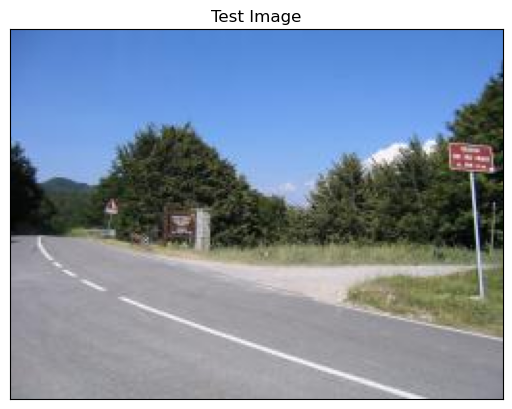

In [10]:
#Test Image Visualization
import cv2
image_path = '../test/test/inconnu.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


In [12]:
print(predictions)

[[5.0159360e-10 4.7273566e-14 2.9224775e-11 2.0787391e-12 1.8056690e-11
  6.0619163e-09 2.3932179e-15 1.1191229e-11 3.0361815e-09 2.6254393e-11
  2.1577561e-13 5.7422951e-17 8.0463224e-14 2.7012986e-15 1.2399111e-20
  1.0000000e+00 3.2046420e-15 6.3162610e-13 5.0914957e-14 1.7174584e-12
  4.6261594e-15 2.4495624e-13 9.3684640e-18 7.4217054e-13 2.0281552e-15
  9.3575425e-16 2.0701167e-13 5.7423652e-08 2.9572139e-15 3.0101140e-16
  1.6061979e-14 7.4666953e-11 9.0908331e-10 3.5954820e-12 6.2117413e-18
  2.4162504e-16 7.2801312e-16 2.6630938e-15 1.9212915e-12]]


In [13]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

15


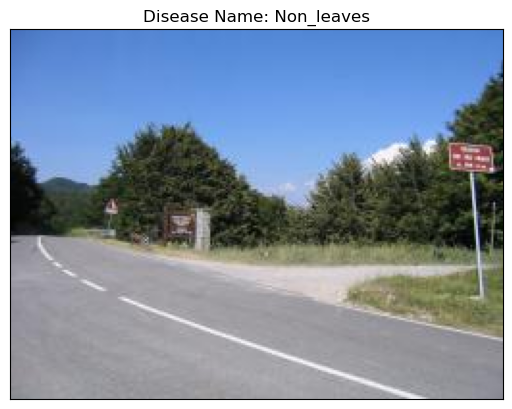

In [14]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()